Function to find root of this project. This is not required when using the code normally

In [1]:
from pathlib import Path
import os

root = Path.cwd()

while not((root / 'requirements.txt').exists() and (root / 'README.md').exists()):
    root = root.parent

root = root / 'src'

os.chdir(root)
print(root)

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\src


# Start of actual code

In [2]:
import numpy as np
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import Matern, WhiteKernel, RBF, RationalQuadratic
import matplotlib.pyplot as plt

from ml_utils.design_eval.bayes_opt import suggest_next_experiment

# example of Bayesian Optimization in a 1D system

Text(0, 0.5, 'acq. func. value')

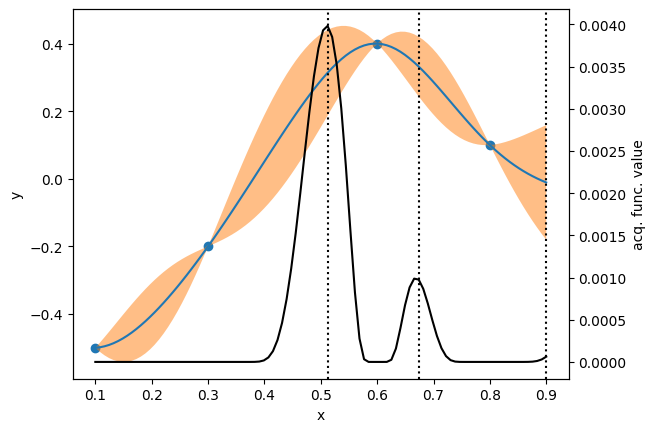

In [3]:
# import the data
X = np.array([[0.1], [0.3], [0.6], [0.8]])
y = np.array([-0.5, -0.2, 0.4, 0.1])

# fit the model
kernel = Matern(length_scale=1.0, nu=2.5)
gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=5,
    random_state=0)

gp.fit(X, y)

# define the candidate space
X_candidates = np.linspace(0.1,0.9,100).reshape(-1, 1)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, x_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='max',
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=3,
                                                        kriging_believer='prediction',
                                                        xi=0.1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
ax2.plot(X_candidates_1d, acq[0], c='k')
for x in x_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')

# more complex example

## pretend that this is our exact system

Text(0, 0.5, 'y')

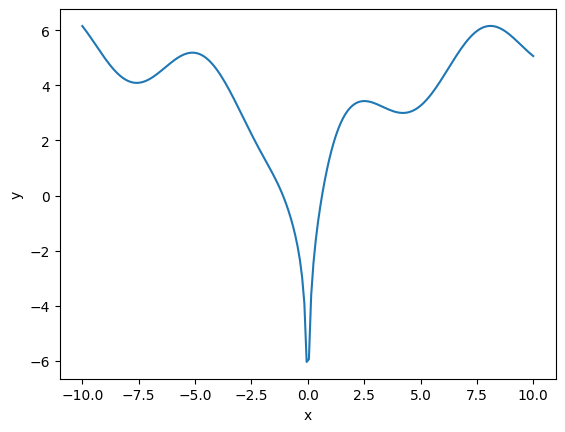

In [4]:
def my_system(x):
    return np.sin(x) - np.exp(-x**2) + np.log(x**2) + 1

fig = plt.figure()
ax = fig.add_subplot(111)

X = np.linspace(-10, 10, 200)
y = my_system(X)
ax.plot(X, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

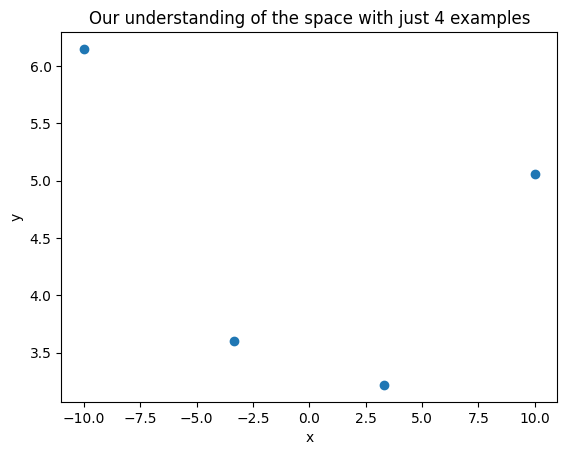

In [5]:
# let's start with 4 evenly spaced points
x_min_design, x_max_design, n_data = -10, 10, 4
X = np.linspace(x_min_design, x_max_design, n_data).reshape(-1, 1)
y = my_system(X).flatten()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.flatten(), y)
ax.set_title('Our understanding of the space with just 4 examples')
ax.set_xlabel('x')
ax.set_ylabel('y')

# use Bayes opt to find the global maximum
## start with the basic model

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warn

Text(0, 0.5, 'acq. func. value')

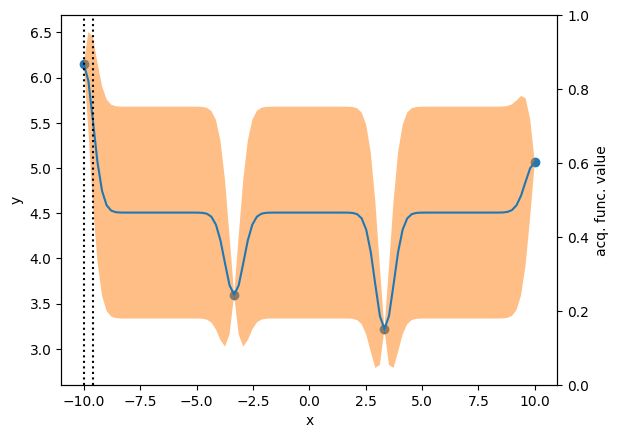

In [6]:
# fit the model
kernel = RationalQuadratic() + WhiteKernel(0.1)

gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=100,
    random_state=0)

gp.fit(X, y)

# define the candidate space
X_candidates = np.linspace(x_min_design, x_max_design, 100).reshape(-1, 1)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, X_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='max',
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=2,
                                                        kriging_believer='prediction',
                                                        xi=1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
for x in X_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')


## update the model and try again

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0, 0.5, 'acq. func. value')

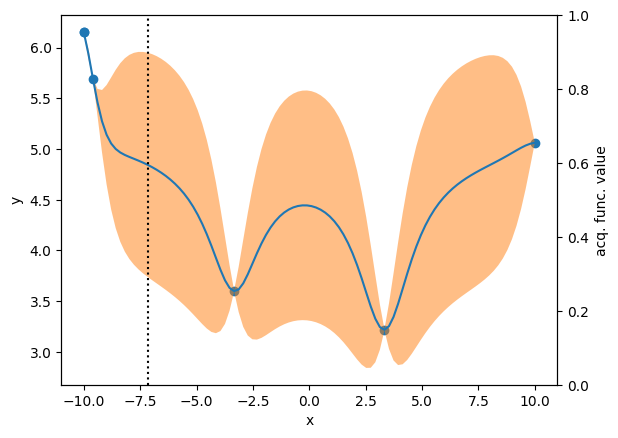

In [7]:
X = np.vstack([X, X_suggested])
y = my_system(X).flatten()

gp.fit(X, y)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, X_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='max',
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=1,
                                                        kriging_believer='prediction',
                                                        xi=0.1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
for x in X_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')

## update the model and try again

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0, 0.5, 'acq. func. value')

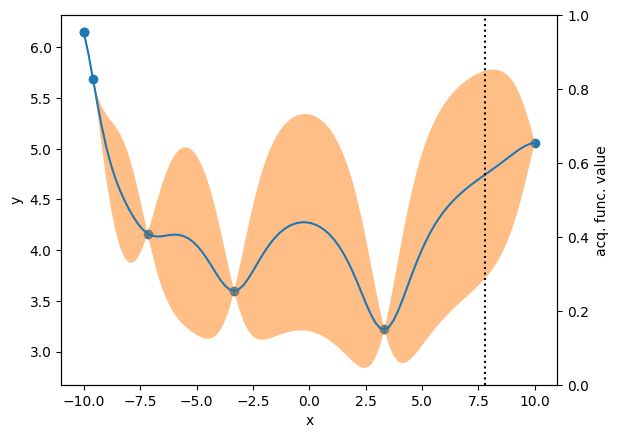

In [8]:
X = np.vstack([X, X_suggested])
y = my_system(X).flatten()

gp.fit(X, y)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, X_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='max',
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=1,
                                                        kriging_believer='prediction',
                                                        xi=0.1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
for x in X_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')

## update once more and compare with ground truth
we see that we got a really good maximum

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


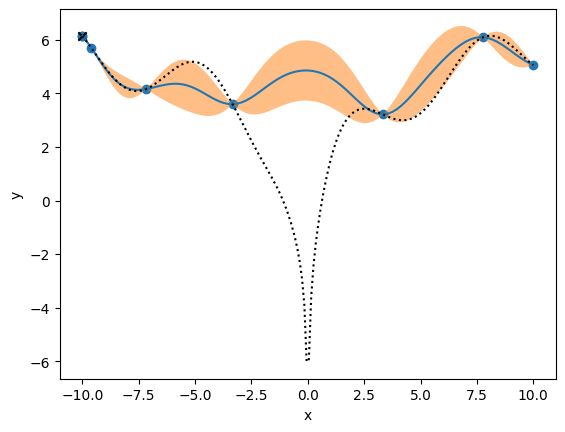

In [9]:
X = np.vstack([X, X_suggested])
y = my_system(X).flatten()

gp.fit(X, y)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')

X_truth = np.linspace(x_min_design, x_max_design, 200)
y_truth = my_system(X_truth)
ax.plot(X_truth, y_truth, c='k', ls=':')
ax.set_xlabel('x')
ax.set_ylabel('y')

# save the final max from Bayes Opt
i = np.argmax(y)
bayes_opt_best_max = (X[i], y[i])
ax.scatter(bayes_opt_best_max[0], bayes_opt_best_max[1], c='k', marker='x')

# now, let's try to find the global minimum
## reset the design, startign witht the same data

Text(0, 0.5, 'y')

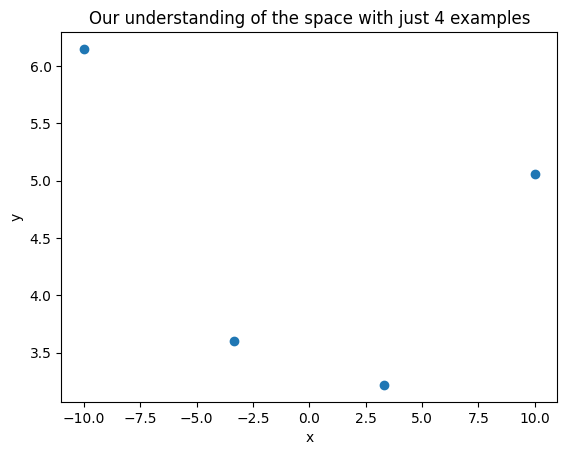

In [10]:
X = np.linspace(x_min_design, x_max_design, n_data).reshape(-1, 1)
y = my_system(X).flatten()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.flatten(), y)
ax.set_title('Our understanding of the space with just 4 examples')
ax.set_xlabel('x')
ax.set_ylabel('y')

## let's do the same, but now we minize

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0, 0.5, 'acq. func. value')

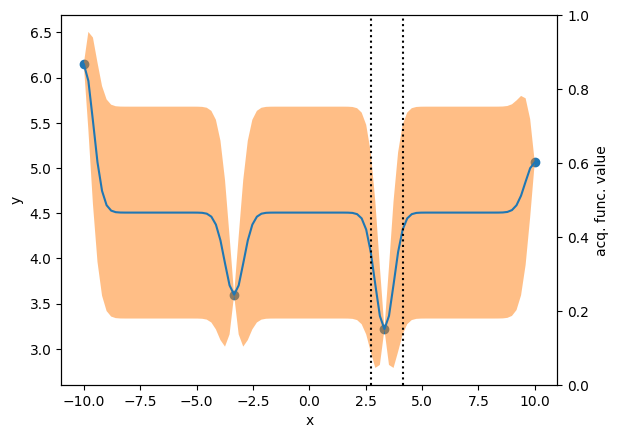

In [11]:
# fit the model
kernel = RationalQuadratic() + WhiteKernel(0.1)

gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=100,
    random_state=0)

gp.fit(X, y)

# define the candidate space
X_candidates = np.linspace(x_min_design, x_max_design, 100).reshape(-1, 1)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, X_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='min', # CHANGED TO MIN
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=2,
                                                        kriging_believer='prediction',
                                                        xi=1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
for x in X_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')


## let's repeat 3x

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge after 12 iteration(s) (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and cal

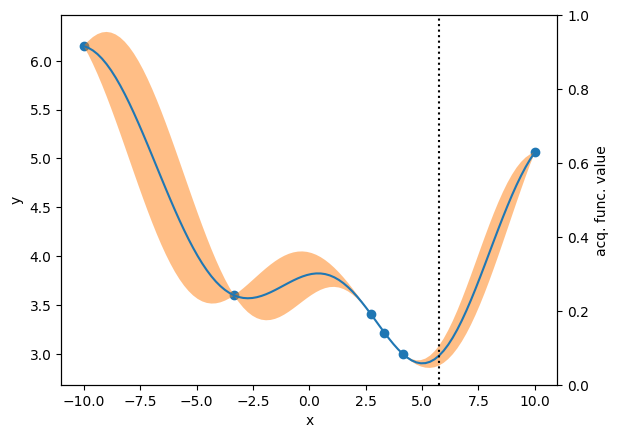

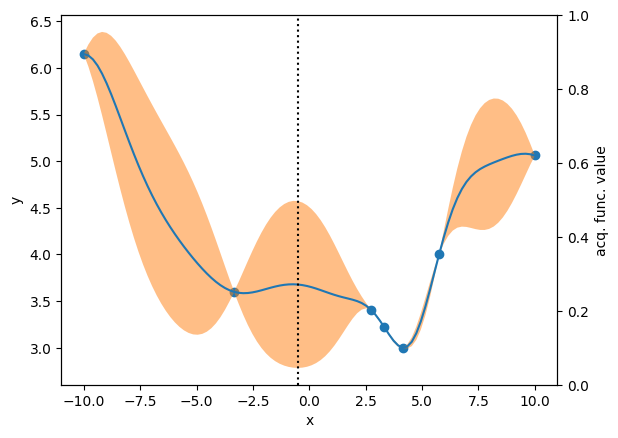

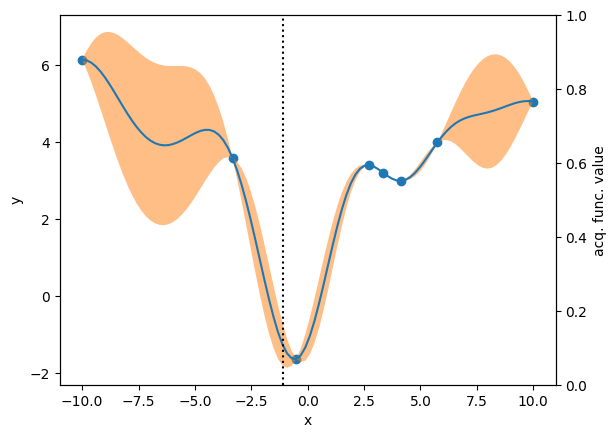

In [12]:
for _ in range(3):
    X = np.vstack([X, X_suggested])
    y = my_system(X).flatten()

    gp.fit(X, y)

    # use Bayesian Optimization to recommend 3 experiments
    acq, i_suggested, X_suggested = suggest_next_experiment(X,
                                                            y,
                                                            X_candidates,
                                                            goal='min',
                                                            model_actual=gp,
                                                            acq_func_name='EI',
                                                            n_suggestions=1,
                                                            kriging_believer='prediction',
                                                            xi=0.1)

    # visualize the results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, y)

    y_pred, y_std = gp.predict(X_candidates, return_std=True)

    X_candidates_1d = X_candidates.flatten()
    ax.plot(X_candidates_1d, y_pred)
    ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

    ax2 = ax.twinx()
    for x in X_suggested:
        ax.axvline(x, c='k', ls=':')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax2.set_ylabel('acq. func. value')
    fig.show()

## let's see how good our model did

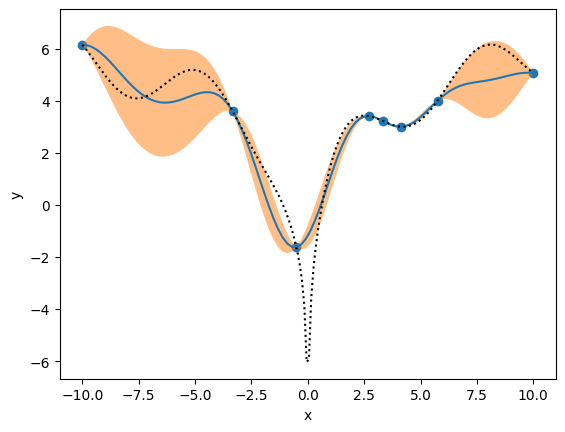

In [13]:
# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')

X_truth = np.linspace(x_min_design, x_max_design, 200)
y_truth = my_system(X_truth)
ax.plot(X_truth, y_truth, c='k', ls=':')
ax.set_xlabel('x')
ax.set_ylabel('y')

i = np.argmin(y)
bayes_opt_best_min = (X[i], y[i])

# but why not just take x points evenly spaced?

So let's try to fit a model that took 8 evenly spaced points

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


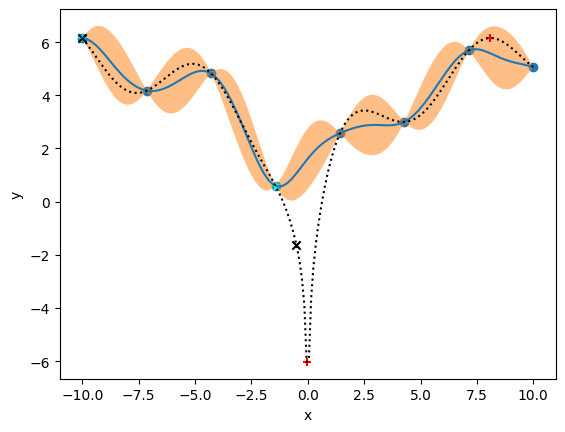

In [14]:
# get the same number of points as Bayes opt above but evenly spaced
X = np.linspace(x_min_design, x_max_design, X.shape[0]).reshape(-1, 1)
y = my_system(X).flatten()

# fit the model
kernel = RationalQuadratic() + WhiteKernel(0.1)

gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=100,
    random_state=0)

gp.fit(X, y)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')

X_truth = np.linspace(x_min_design, x_max_design, 200)
y_truth = my_system(X_truth)
ax.plot(X_truth, y_truth, c='k', ls=':')
ax.set_xlabel('x')
ax.set_ylabel('y')

# plot the global min and global max of the evenly spread set
i = np.argmin(y)
ax.scatter(X[i], y[i], c='aqua', marker='*')
i = np.argmax(y)
ax.scatter(X[i], y[i], c='aqua', marker='*')

# plot the min and max from Bayes Opt
ax.scatter(bayes_opt_best_max[0], bayes_opt_best_max[1], c='k', marker='x')
ax.scatter(bayes_opt_best_min[0], bayes_opt_best_min[1], c='k', marker='x')

# plot the true min and max
i = np.argmin(y_truth)
ax.scatter(X_truth[i], y_truth[i], c='r', marker='+')
i = np.argmax(y_truth)
ax.scatter(X_truth[i], y_truth[i], c='r', marker='+')

We see that, at worst, Bayes Opt is approx. comparable to evenly spaced experimentation. At best, Bayes Opt is approx. better than evenly spaced experimentation. However, when it comes to getting a general idea of the entire space, evenly spaced experiments are definitely superior.